### In this EDA we'll have a look at the type of connection and how popular they are, as well as the download speed these different services offer throughout the years and across the country focusing mainly on wireless connection an its speed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We import a DataSet that shows Internet access by tech and by province

In [3]:
df = pd.read_csv('../DataSets/Internet_Accesos-por-tecnologia_y_pcia.csv', sep = ',')

Inspect the DataSet

In [4]:
df.head()

,Unnamed: 0,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
0,0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


Get an insight of it

In [5]:
df.describe()

,Unnamed: 0,Year,Quarter,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,431.500000,2018.000000,2.500000,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,249.559612,2.583484,1.118682,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,215.750000,2016.000000,1.750000,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,431.500000,2018.000000,2.500000,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,647.250000,2020.000000,3.250000,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,863.000000,2022.000000,4.000000,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   864 non-null    int64  
 1   Year         864 non-null    int64  
 2   Quarter      864 non-null    int64  
 3   Province     864 non-null    object 
 4   ADSL         864 non-null    float64
 5   Cable modem  864 non-null    float64
 6   Optic Fiber  864 non-null    float64
 7   Wireless     864 non-null    float64
 8   Others       864 non-null    float64
 9   Total        864 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 67.6+ KB


See how many null values there are in our DataFrame and delete them

In [7]:
df.isna().sum()

Unnamed: 0     0
Year           0
Quarter        0
Province       0
ADSL           0
Cable modem    0
Optic Fiber    0
Wireless       0
Others         0
Total          0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Unnamed: 0     0
Year           0
Quarter        0
Province       0
ADSL           0
Cable modem    0
Optic Fiber    0
Wireless       0
Others         0
Total          0
dtype: int64

Now check for any duplicate value

In [10]:
df.duplicated().sum()

0

Rename the columns for an easier read

In [11]:
dfColumns = {'Año': 'Year', 'Provincia': 'Province', 'Fibra óptica': 'Optic Fiber', 'Trimestre': 'Quarter', 'Otros': 'Others', 'Cablemodem': 'Cable modem'}

In [12]:
df.rename(columns = dfColumns, inplace = True)

In [13]:
df.head()

,Unnamed: 0,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
0,0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


Explore the `Year` & `Quarter` column to see its unique values

In [14]:
df['Quarter'].unique()

array([4, 3, 2, 1], dtype=int64)

In [15]:
df['Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

We see that there are some values with an '*`*`*', which we do not quite know its meaning.

We create a temporary DataFrame with only asterisk (`*`) values to better understand the data when deciding whether to discard them or not

In [16]:
asterisk = df[df['Quarter'].isin(['3 *', '2 *', '1 *'])]

In [17]:
asterisk.head(50)

,Unnamed: 0,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total


At first glance, these values seem to be just fine. We are going to keep them but first we'll do some data cleaning

### We drop the * from the Year and Quarter columns

In [18]:
# We define a replace map
replace_mapping = {'3 *': '3', '2 *': '2', '1 *': '1'}

df['Quarter'] = df['Quarter'].replace(replace_mapping)

In [19]:
df['Quarter'].unique()

array([4, 3, 2, 1], dtype=int64)

We do the same thing for the `Year` column, but just for the value _2019_

In [20]:
df['Year'] = df['Year'].replace('2019 *', '2019')

In [21]:
df['Year'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [22]:
df.to_csv('../DataSets/Internet_Accesos-por-tecnologia_y_pcia.csv', sep = ',')

In [29]:
df.drop(columns='Unnamed: 0', inplace= True)
df.to_csv('../Wireless.csv', index = False, sep = ',')

In [27]:
df

,Unnamed: 0,Year,Quarter,Province,ADSL,Cable modem,Optic Fiber,Wireless,Others,Total
0,0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0
...,...,...,...,...,...,...,...,...,...,...
859,859,2014,1,Santa Cruz,19.0,100.0,381.0,4.0,3.0,27.0
860,860,2014,1,Santa Fe,323.0,174.0,3.0,6.0,644.0,507.0
861,861,2014,1,Santiago Del Estero,33.0,4.0,19.0,915.0,34.0,37.0
862,862,2014,1,Tierra Del Fuego,22.0,3.0,648.0,1.0,3.0,28.0


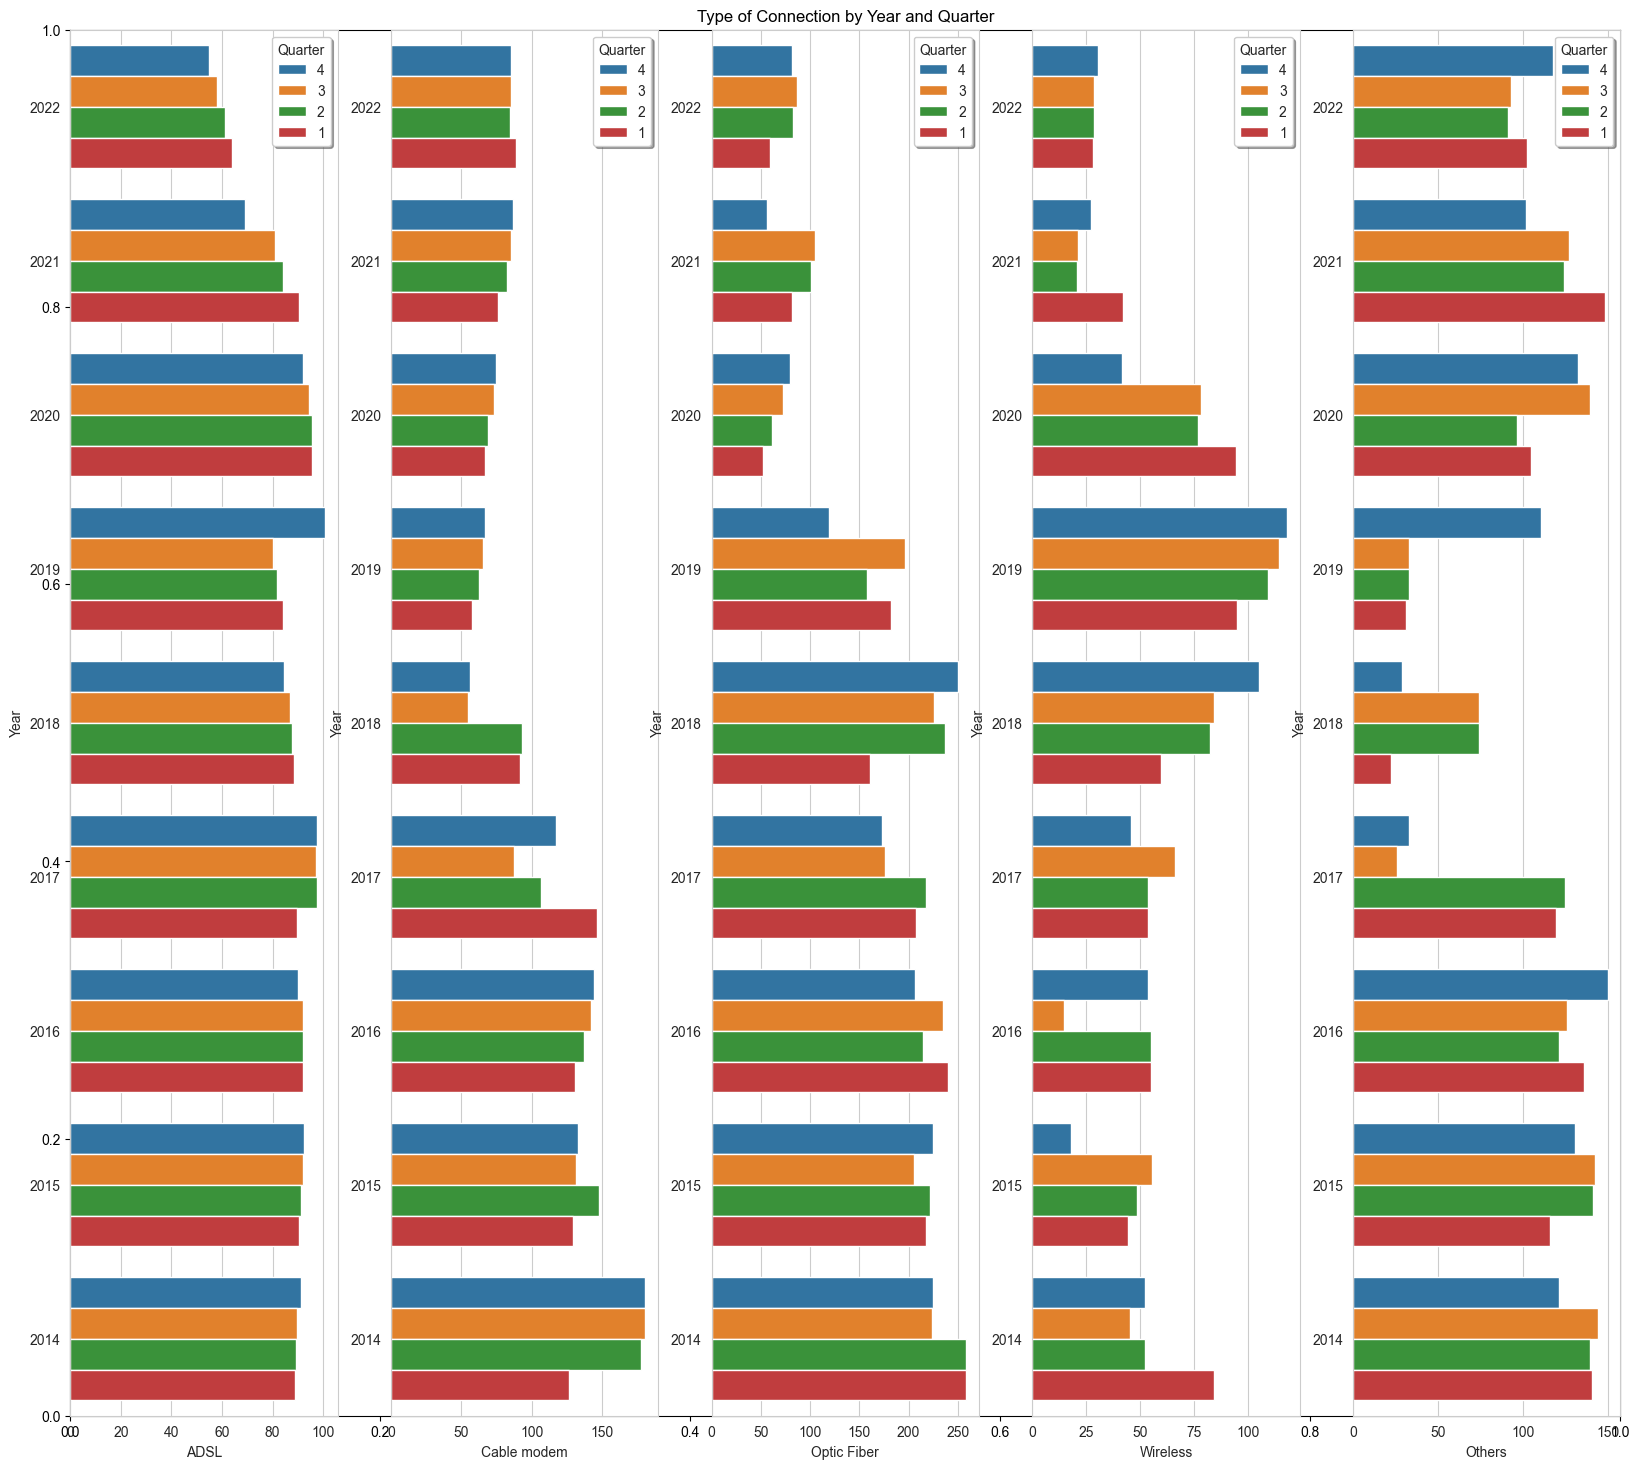

In [23]:
plt.figure(figsize = (20, 18))
plt.title('Type of Connection by Year and Quarter')
sns.set_style('whitegrid')


# ADSL barplot
plt.subplot(1, 5, 1)
sns.barplot(data = df, x = 'ADSL', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Cable modem barplot
plt.subplot(1, 5, 2)
sns.barplot(data = df, x = 'Cable modem', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Optic Fiber barplot
plt.subplot(1, 5, 3)
sns.barplot(data = df, x = 'Optic Fiber', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Wireless barplot
plt.subplot(1, 5, 4)
sns.barplot(data = df, x = 'Wireless', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


# Others barplot
plt.subplot(1, 5, 5)
sns.barplot(data = df, x = 'Others', y = 'Year', hue = 'Quarter', errorbar = None)
plt.legend(title = 'Quarter', loc = 'best', shadow = True)


plt.show()

## Some takeaways

 - Although it saw a slight increase from 2018 to 2020, ``Wireless`` connection is the least popular throughout the years. <br>
 - In the last year, the ``ADSL`` connection was the most popular one. <br>
 - ``Optic fiber`` has dropped significantly in the last two years compared to the previous ones.<br>

## See what percentage each connection technology represented in the last year

In [33]:
connections = ['ADSL', 'Cable modem', 'Optic Fiber', 'Wireless']

In [34]:
df['Year'] = df['Year'].astype('int16')

In [35]:
df2021 = df[df['Year'] == 2021]

In [36]:
df2022 = df[df['Year'] == 2022]

In [37]:
totalConnections2021 = df2021[connections].sum()
type(totalConnections2021)

pandas.core.series.Series

# We plot a pie chart since is much simpler to know the size of each category

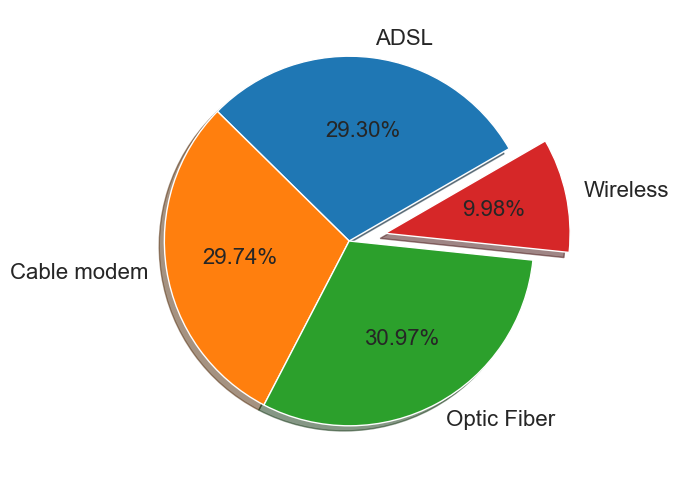

In [29]:
explode = (0, 0, 0, 0.2)

fig, ax = plt.subplots(figsize = (14, 6))

ax.pie(totalConnections2021, labels = totalConnections2021.index, autopct = '%1.2f%%', startangle = 30, explode = explode, shadow = True, textprops = {'fontsize': '16'}, radius = 1)

plt.show()

# Now we do the same, but for the year 2022

In [30]:
totalConnections2022 = df2022[connections].sum()
totalConnections2022

ADSL           5715.0
Cable modem    8244.0
Optic Fiber    7457.0
Wireless       2765.0
dtype: float64

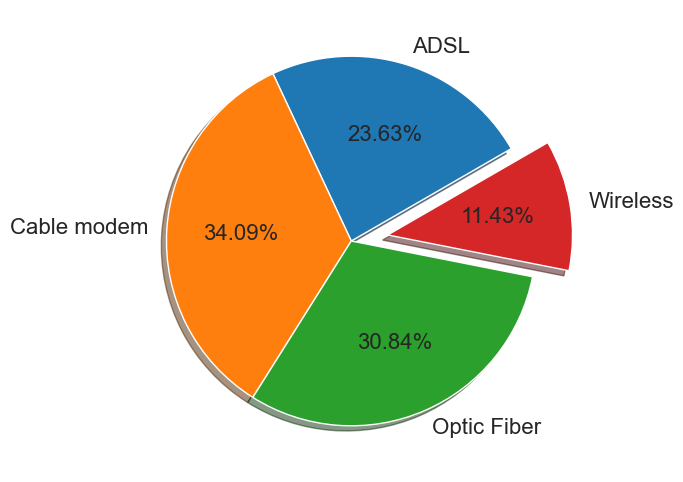

In [31]:
explode = (0, 0, 0, 0.2)

fig, ax = plt.subplots(figsize = (14, 6))

ax.pie(totalConnections2022, labels = totalConnections2022.index, autopct = '%1.2f%%', startangle = 30, explode = explode, shadow = True, textprops = {'fontsize': '16'}, radius = 1)

plt.show()

## We see that wireless connection has increased slightly.

## See the number of connections for each province

In [32]:
df['Total Connections'] = df['Wireless'] + df['Optic Fiber'] + df['ADSL'] + df['Cable modem']

In [33]:
dfTotal = df.groupby('Province')['Total Connections'].sum()

In [34]:
dfTotal = dfTotal.sort_values(ascending = False)

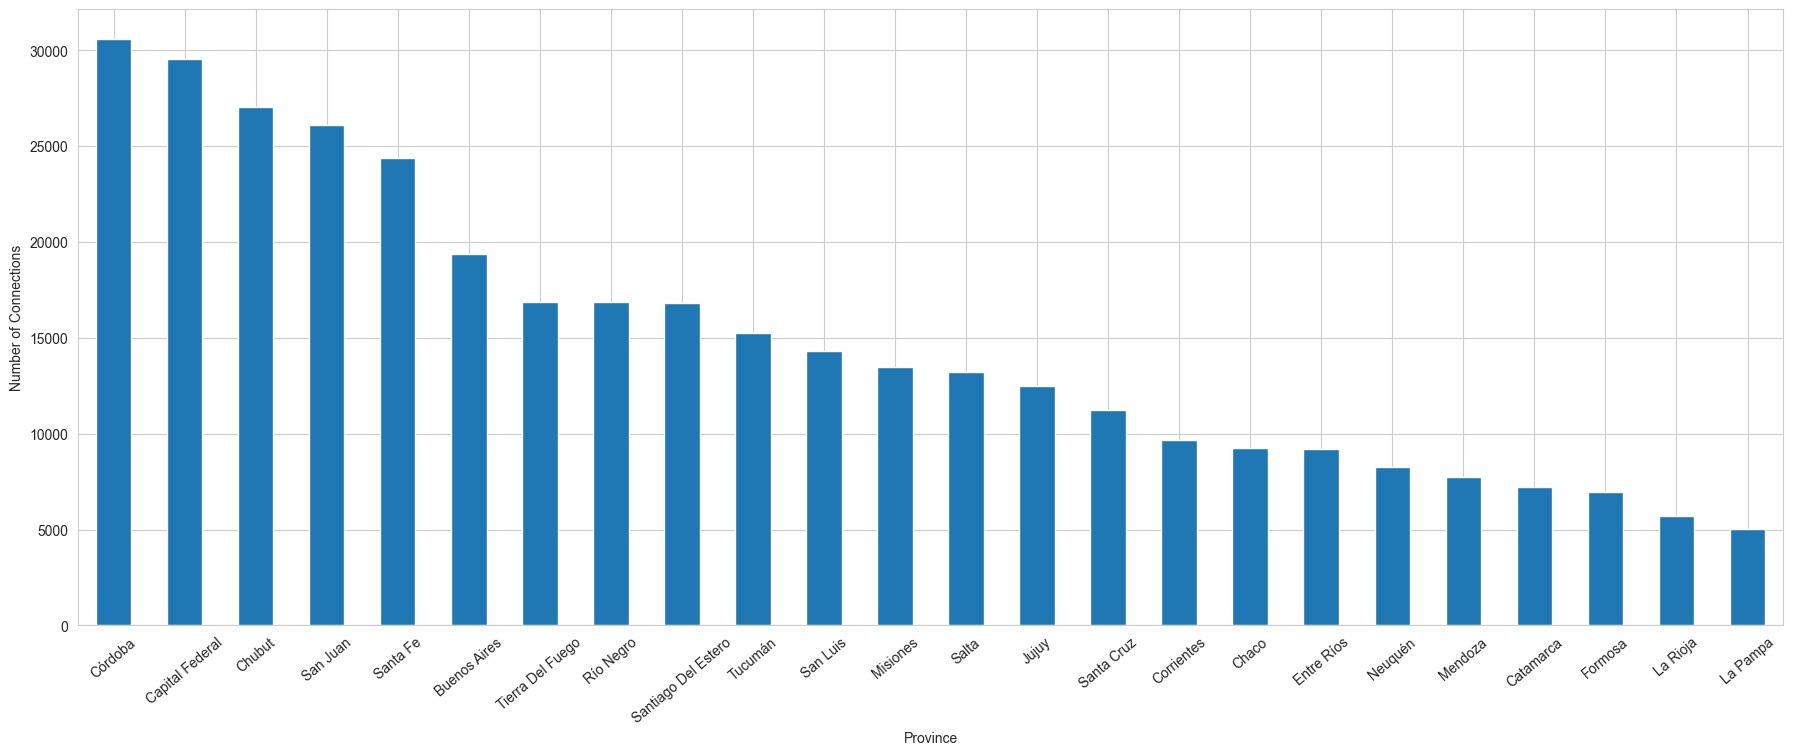

In [35]:
plt.figure(figsize = (22, 8))
dfTotal.plot(kind = 'bar')
plt.xlabel('Province')
plt.ylabel('Number of Connections')
plt.xticks(rotation = 40)
plt.show()

 - As we can see, the province with the most connections is ``Córdoba``, whereas the province with the least amount of connections is `La Pampa`
 - More than half the provinces have 10000 or more connections. We could aim to get the remaining 9 provinces to be up there.
 - The disparity shown above could be to the fact that the provinces on the left side of the graph are either more populated or have a better infraestructure than the ones with less Internet connections.
___
___

# Load a second csv file, which shows the download speed by province

In [36]:
df2 = pd.read_csv('../DataSets/Internet_Accesos-por-velocidad_por_pcia.csv', sep = ',')

In [37]:
df2.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


### Rename the columns for an easier read

In [38]:
df2Columns = {'Año': 'Year', 'Trimestre': 'Quarter', 'Provincia': 'Province', 'HASTA 512 kbps': 'Up To 512 kbps', 'OTROS': 'Others',}

In [39]:
df2.rename(columns = df2Columns, inplace = True)

In [40]:
df2.head()

,Year,Quarter,Province,Up To 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Others,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 864 non-null    int64  
 1   Quarter              864 non-null    int64  
 2   Province             864 non-null    object 
 3   Up To 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    object 
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    object 
 10  Others               858 non-null    float64
 11  Total                864 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 81.1+ KB


### Check for null and duplicate values

In [42]:
df2.isna().sum()

Year                   0
Quarter                0
Province               0
Up To 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
Others                 6
Total                  0
dtype: int64

### Drop all the null values

In [43]:
df2.dropna(inplace = True)

In [44]:
df2.reset_index()

,index,Year,Quarter,Province,Up To 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Others,Total
0,0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,859,2014,1,Santa Cruz,161.000,1.625,24.972,1.000,1.000,0.000,0,0.000,26.760
854,860,2014,1,Santa Fe,8.456,124.468,345.225,20.328,6.845,23.000,668,0.000,506.013
855,861,2014,1,Santiago Del Estero,1.234,10.531,22.817,2.422,109.000,0.000,0,0.000,37.113
856,862,2014,1,Tierra Del Fuego,12.000,607.000,30.902,6.000,0.000,0.000,0,0.000,31.527


In [45]:
df2.isna().sum()

Year                   0
Quarter                0
Province               0
Up To 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
Others                 0
Total                  0
dtype: int64

### See if there is any duplicate value

In [46]:
df2.duplicated().value_counts()

False    858
Name: count, dtype: int64

In [47]:
df2.reset_index(inplace = True)

In [48]:
df2.drop('index', axis = 1, inplace = True)

In [49]:
df2.head()

,Year,Quarter,Province,Up To 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Others,Total
0,2022,4,Buenos Aires,28.934,23.347,259.866,281.550,244.555,98.670,3.760.109,97.634,4.794.665
1,2022,4,Capital Federal,516.000,5.096,31.320,64.653,36.336,8.116,1.299.117,106.772,1.551.926
2,2022,4,Catamarca,71.000,315.000,2.716,5.028,4.638,3.122,52.739,2.280,70.909
3,2022,4,Chaco,461.000,771.000,16.067,17.846,6.704,3.039,94.866,3.909,143.663
4,2022,4,Chubut,109.000,1.614,46.457,31.007,34.728,15.770,19.048,20.026,168.759


### Since most of the people nowadays have faster Internet connections than years ago, we'll just be working with 30+ MBps of speed.
#### In order to do so, we first need to convert said column to a numeric column

In [50]:
df2['+ 30 Mbps'] = pd.to_numeric(df2['+ 30 Mbps'], errors = 'coerce')

### Visualize the mean value for each province

In [51]:
sumConnection = (df2['+ 30 Mbps'].sum())

In [52]:
countConnection = df2['+ 30 Mbps'].count()

In [53]:
nationalMean = sumConnection / countConnection
nationalMean

91.622177245509

In [54]:
orderedConnection = df2.groupby('Province')['+ 30 Mbps'].mean().sort_values(ascending = False).index

In [55]:
sorted_df2 = df2.sort_values(by ='+ 30 Mbps', ascending = False)
sorted_df2.dropna()

,Year,Quarter,Province,Up To 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,Others,Total
336,2019,2,Buenos Aires,199.768,46.852,1.436.259,217.785,438.663,502.275,985.767,43.438,3.870.807
94,2022,1,Tierra Del Fuego,24.000,894.000,12.849,15.640,18.034,1.767,982.000,2.421,52.611
217,2020,3,Capital Federal,264.000,312.000,162.222,85.083,68.753,78.028,977.766,247.000,1.372.675
142,2021,3,Tierra Del Fuego,17.000,0.000,23.723,13.397,9.782,1.433,976.000,895.000,50.223
322,2019,3,La Pampa,237.000,3.289,75.849,5.922,1.611,1.359,941.000,1.618,90.826
...,...,...,...,...,...,...,...,...,...,...,...,...
757,2015,1,Santa Cruz,205.000,27.000,26.048,2.000,0.000,0.000,0.000,0.000,26.282
596,2016,3,Catamarca,15.000,4.038,16.183,4.845,1.853,50.000,0.000,0.000,26.984
598,2016,3,Chubut,466.000,5.190,74.375,674.000,0.000,0.000,0.000,0.000,80.705
603,2016,3,Jujuy,286.000,6.878,27.425,5.943,1.978,31.000,0.000,0.000,42.541


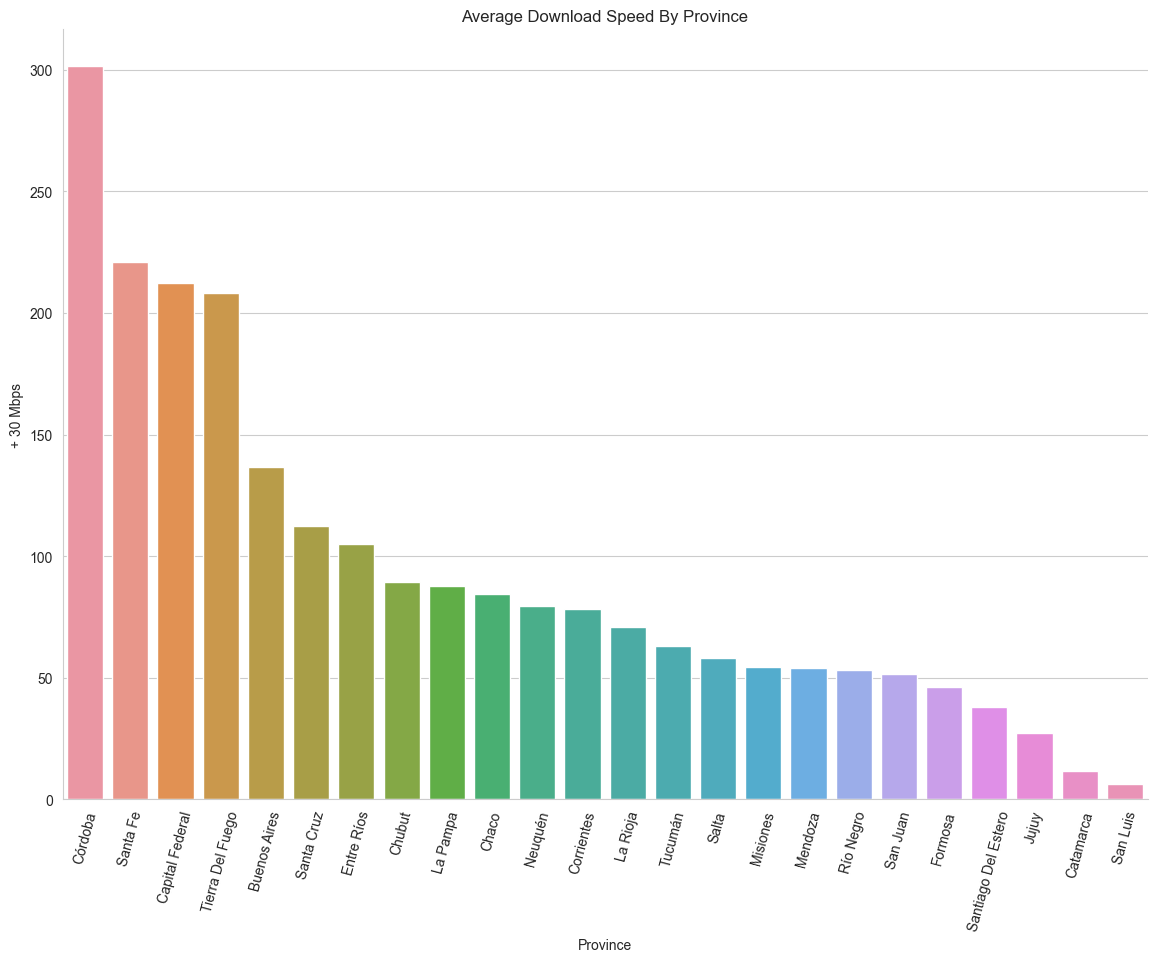

In [56]:
plt.figure(figsize = (14, 10))
 
sns.barplot(data = sorted_df2, x = 'Province', y = '+ 30 Mbps',order = orderedConnection, errorbar = None)
sns.despine()
plt.title('Average Download Speed By Province')
plt.xticks(rotation = 75)
plt.show()

## As we can see, the province with the highest amount of high-speed Internet is `Córdoba` whilst `San Luis` is the one with the least high-speed connections <br>
### We see that only seven provinces have on average a higher speed than the national mean

# ``Conclusions``

 - ## The availability of wireless connections is still scarce, despite being implemented several years ago.
 - ## Wireless connection has seen a minor increase across the country.
 - ## High-speed Internet connection is yet to become a common feature in many cities regardless of its location, limiting access to fast and reliable connectivity for a significant portion of the population and preventing them from reaping the benefits it offers
 - ## The northern provinces of the country have the slowest connections, posing challenges for businesses to thrive.